In [1]:
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, MaxPooling2D, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
import time
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [6]:
inputs = Input(shape=(28,28,1))
# Encoder Layers
conv_1 = Conv2D(32, (3, 3), activation='relu', name='conv_1')(inputs) 
maxpool_1 = MaxPooling2D((2, 2), name='maxpool_1')(conv_1)
conv_2 = Conv2D(64, (3, 3), activation='relu', name='conv_2')(maxpool_1) 
maxpool_2 = MaxPooling2D((2, 2), name='maxpool_2')(conv_2)
conv_3 = Conv2D(64, (3, 3), activation='relu', name='conv_3')(maxpool_2) 
flat = Flatten(name='flat')(conv_3)
dense_1 = Dense(64, activation='relu', name='dense_1')(flat)
output = Dense(10, activation='softmax', name='output')(dense_1)

ae = Model(inputs=inputs, outputs=output)
#monitor = EarlyStopping(monitor='loss', min_delta=0.0001, patience=5, verbose=1, mode='auto')
ae.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
ae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 13, 13, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 11, 11, 64)        18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 5, 5, 64)          0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 3, 3, 64)          36928     
_________________________________________________________________
flat (Flatten)               (None, 576)               0         
__________

In [7]:
time_callback = TimeHistory()
ae.fit(train_images, train_labels, epochs=5, batch_size=64, callbacks=[time_callback])

Epoch 1/5
60000/60000 [==============================] - 23s 380us/step - loss: 0.1781 - acc: 0.9427
Epoch 2/5
60000/60000 [==============================] - 23s 376us/step - loss: 0.0474 - acc: 0.9854
Epoch 3/5
60000/60000 [==============================] - 23s 382us/step - loss: 0.0338 - acc: 0.9891
Epoch 4/5
60000/60000 [==============================] - 22s 366us/step - loss: 0.0258 - acc: 0.9921
Epoch 5/5
60000/60000 [==============================] - 22s 360us/step - loss: 0.0193 - acc: 0.9943


In [8]:
times = time_callback.times
print(times)

[22.80063486099243, 22.543598890304565, 22.92446994781494, 21.98227095603943, 21.60256600379944]


In [9]:
test_loss, test_acc = ae.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 2s 204us/step
(0.035137195417665135, 0.9898)


In [10]:
output = ae.predict(test_images)

In [11]:
np.argmax(output[0])

7

('prediction:', 5, 'truth:', 9)
('prediction:', 7, 'truth:', 2)
('prediction:', 1, 'truth:', 2)
('prediction:', 0, 'truth:', 6)
('prediction:', 5, 'truth:', 3)
('prediction:', 6, 'truth:', 8)
('prediction:', 2, 'truth:', 8)
('prediction:', 7, 'truth:', 2)


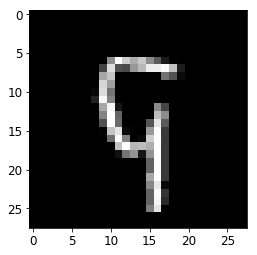

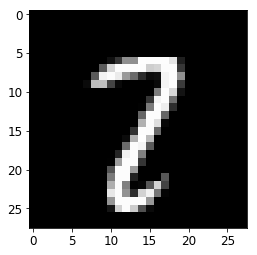

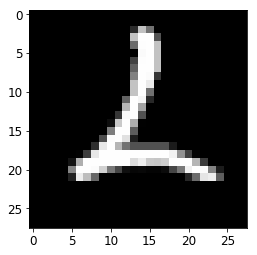

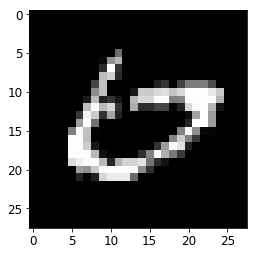

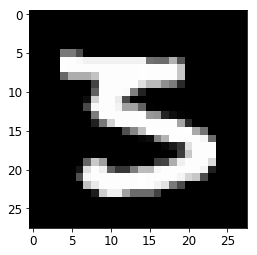

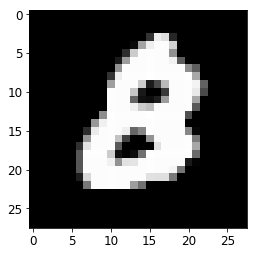

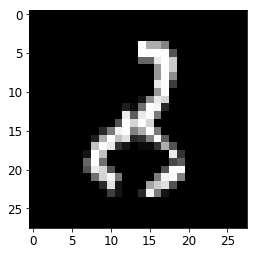

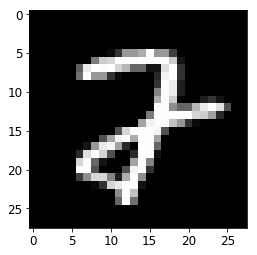

In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def plot_image(image, shape=[28,28]):
    plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
    plt.axis("off")

#rand_choice = np.random.choice(len(test_labels), 10,replace=False)
rand_choice = range(len(test_labels))

j = 0
for i in range(len(rand_choice)):
    if np.argmax(output[rand_choice[i]]) == np.argmax(test_labels[rand_choice[i]]): 
        continue
    plt.figure(j)
    imgplot = plt.imshow(image.array_to_img(test_images[rand_choice[i]]))
    print('prediction:',np.argmax(output[rand_choice[i]]),"truth:",np.argmax(test_labels[rand_choice[i]]))
    j += 1
    if j % 8 == 0:
        break
plt.show()
